In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data from SQLite database to python data frame

In [8]:
# Path to the uploaded SQLite database file
db_path = r'C:\Users\calua\OneDrive - Vodafone Group\Desktop\3Signet\Abc Project\ABC_pharm_data.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Retrieve the list of tables in the database
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, conn)

# Function to load all tables into DataFrames
def load_all_tables(conn, tables):
    dataframes = {}
    for table_name in tables['name']:
        query = f"SELECT * FROM {table_name}"
        dataframes[table_name] = pd.read_sql_query(query, conn)
    return dataframes

# Load all tables
all_dataframes = load_all_tables(conn, tables)

# Display the structure and sample data of each table
for table_name, df in all_dataframes.items():
    print(f"\nTable: {table_name}")
    print(df.head())  # Show the first 5 rows of each table

# Close the database connection
conn.close()


Table: dim_distributor
              Distributor
0  Gottlieb-Cruickshank  
1           Carter-Conn  
2         Prohaska-Kuhic 
3              Smith Inc 
4                Rohan   

Table: sqlite_sequence
         name     seq
0  fact_sales  254082

Table: dim_customer
                           CustomerName     City Country  Latitude  Longitude  \
0               Zieme, Doyle and Kunze    Lublin  Poland   51.2333    22.5667   
1                            Feest PLC   Świecie  Poland   53.4167    18.4333   
2  Medhurst-Beer Pharmaceutical Limited   Rybnik  Poland   50.0833    18.5000   
3                 Barton Ltd Pharma Plc  Czeladź  Poland   50.3333    19.0833   
4                  Keeling LLC Pharmacy  Olsztyn  Poland   53.7800    20.4942   

  Channel Sub_Channel  
0    None        None  
1    None        None  
2    None        None  
3    None        None  
4    None        None  

Table: dim_sales_team
            SalesRep         Manager SalesTeam
0       Mary Gerrard   Britann

### Calculates basic EDA metrics like data shape, missing values, and descriptive statistics

C:\Users\calua\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


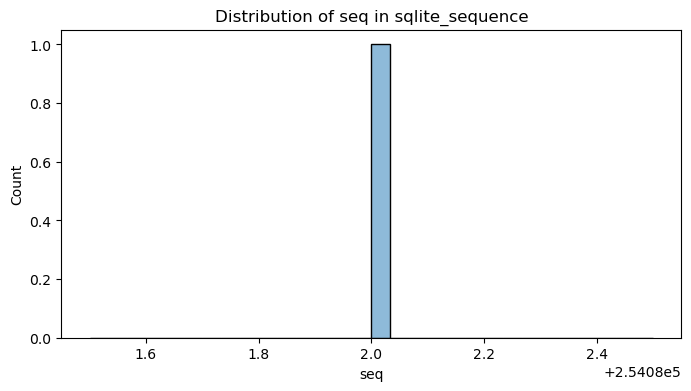

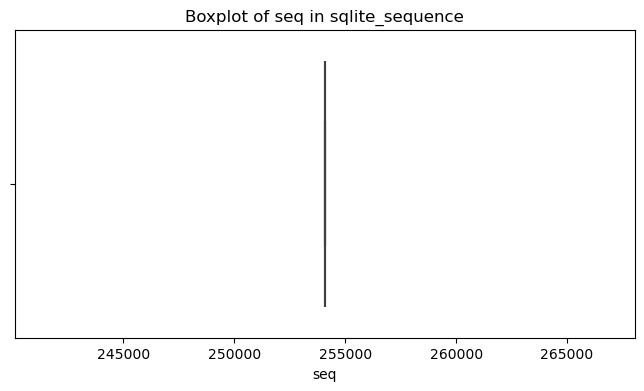

C:\Users\calua\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


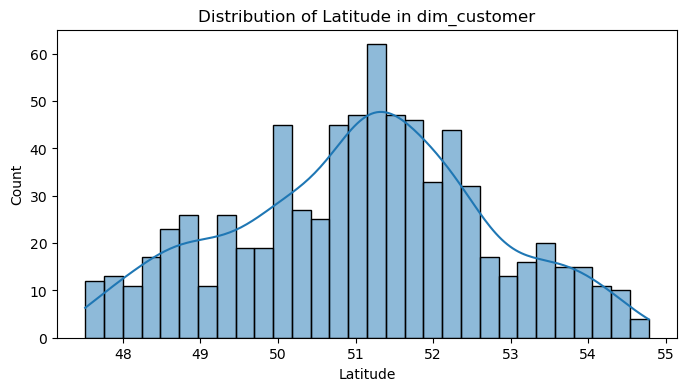

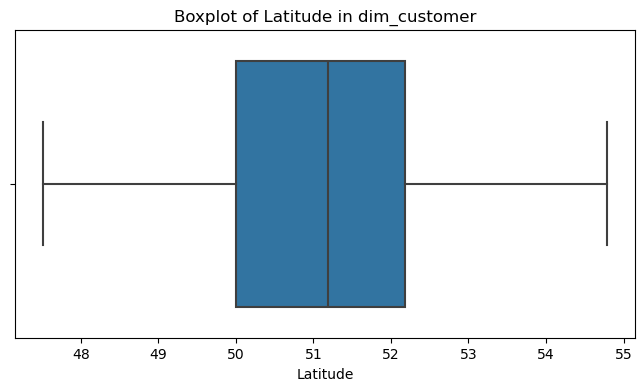

C:\Users\calua\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


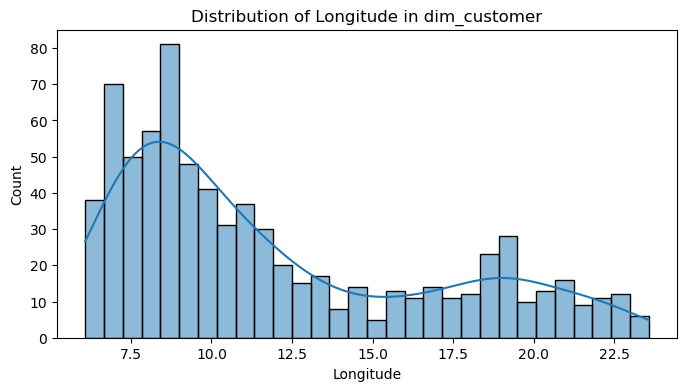

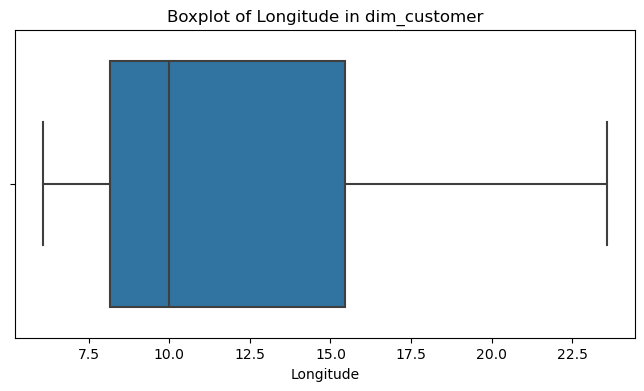

C:\Users\calua\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


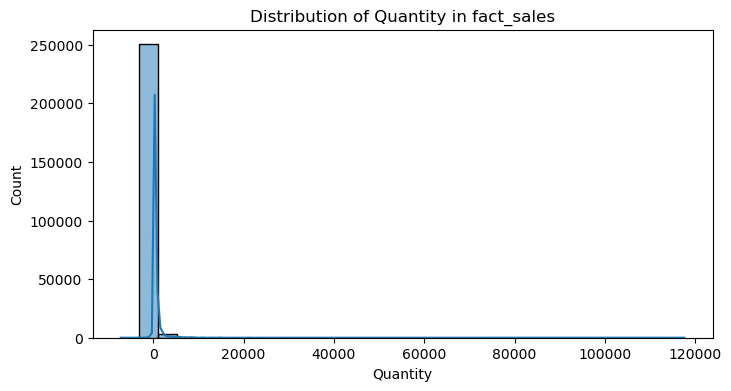

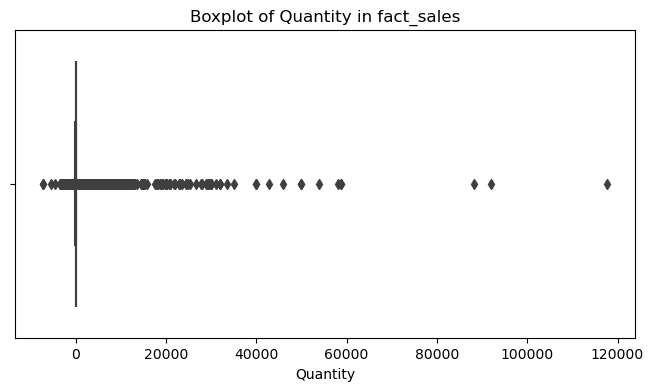

C:\Users\calua\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


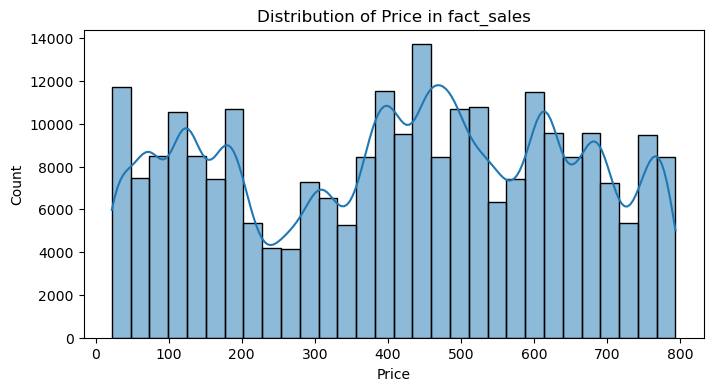

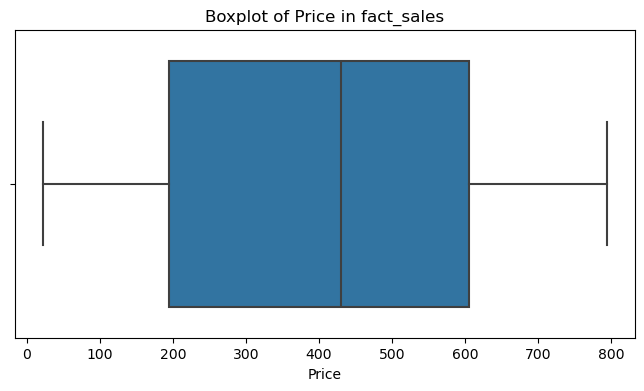

C:\Users\calua\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


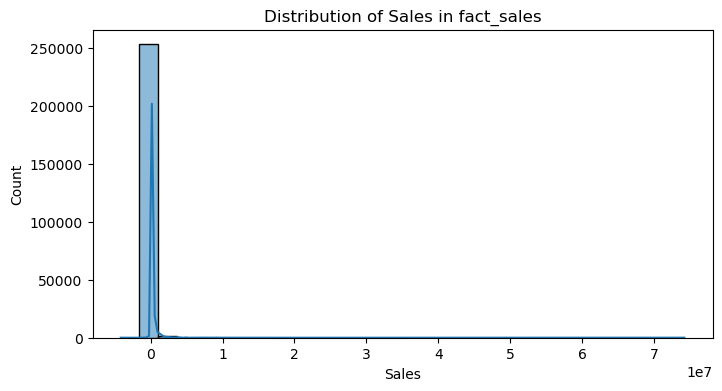

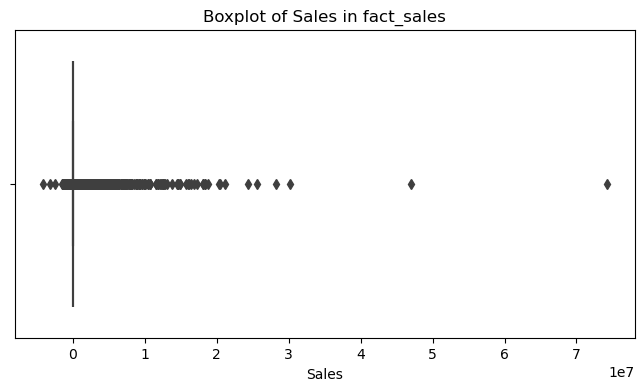

C:\Users\calua\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


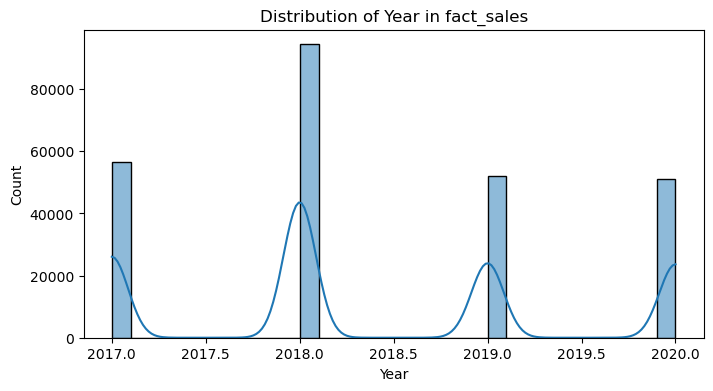

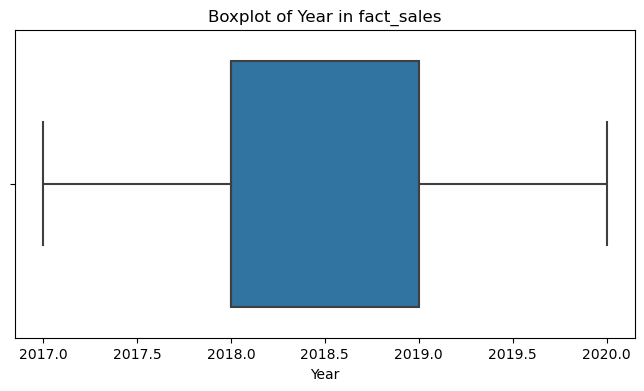

C:\Users\calua\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


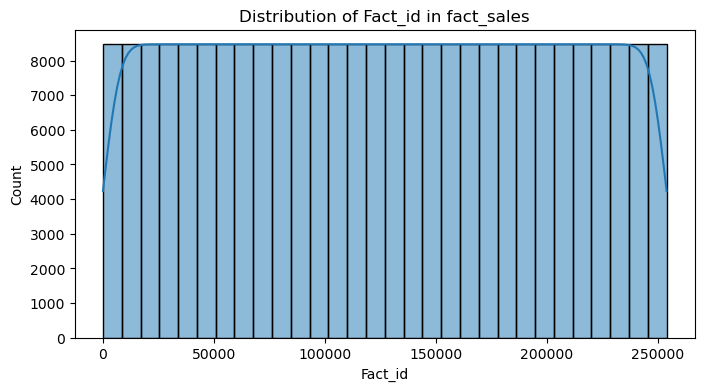

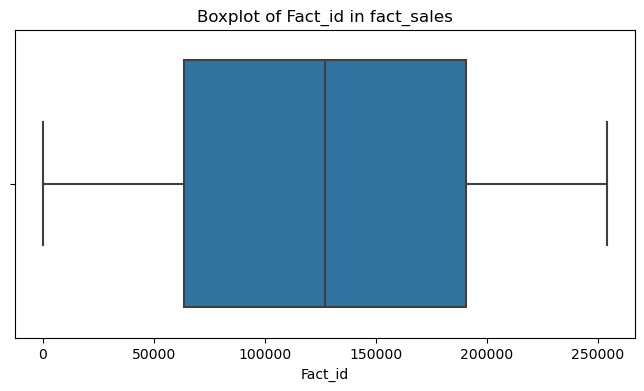

C:\Users\calua\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


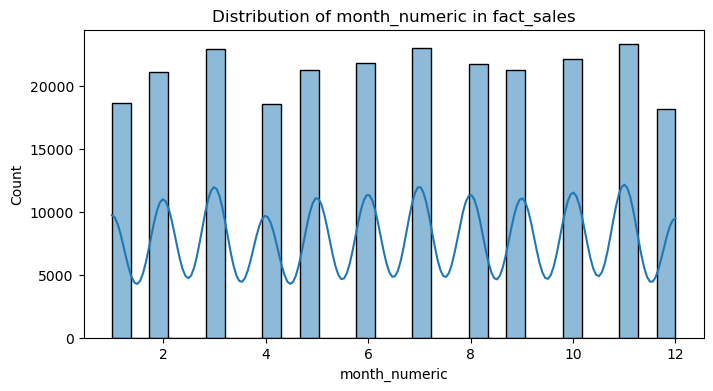

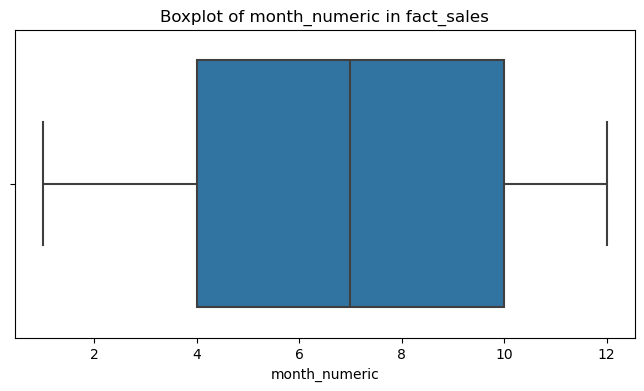

NameError: name 'eda_results' is not defined

In [10]:
# Analyze relationships and distributions for numeric data in all tables
for table_name, df in all_dataframes.items():
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    if not numeric_cols.empty:
        for col in numeric_cols:
            # Plot distribution
            plt.figure(figsize=(8, 4))
            sns.histplot(df[col], kde=True, bins=30)
            plt.title(f"Distribution of {col} in {table_name}")
            plt.show()

            # Boxplot for outliers
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=df[col])
            plt.title(f"Boxplot of {col} in {table_name}")
            plt.show()

# Display high-level summaries of data for review
eda_summaries = {table_name: {"Shape": summary["Shape"], "Missing Values": summary["Missing Values"].sum()} 
                 for table_name, summary in eda_results.items()}

# Print summary of EDA results
for table, summary in eda_summaries.items():
    print(f"Table: {table}")
    print(f"  Shape: {summary['Shape']}")
    print(f"  Total Missing Values: {summary['Missing Values']}")
    print("\n")

# Close the database connection
conn.close()